In [70]:
# 구글 드라이브 연결 준비
from google.colab import drive
import pandas as pd

In [71]:
# 연결
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [72]:
# 파일 읽어오기
users = pd.read_csv("gdrive/MyDrive/users.dat", sep="::", header=None, engine='python',
                        names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])

In [73]:
users


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [74]:
 ratings = pd.read_csv("gdrive/MyDrive/ratings.dat", sep="::",header=None,engine='python',
                          names= ['UserID','MovieID','Rating','Timestamp'])

In [75]:
ratings

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [76]:
    movies = pd.read_csv("gdrive/MyDrive/movies.dat", sep="::",header=None,engine='python',
                         names=['MovieID','Title','Genres'])

In [77]:
df = pd.merge(pd.merge(ratings,users),movies)
(df)

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [78]:
# 피벗테이블: 데이터 요약하는 통계표
# 연습: 성별별로 별점 평균 확인

In [79]:
t1 = df.pivot_table(values='Rating',index='Gender')

In [80]:
t1

,Rating
Gender,
F,3.620366
M,3.568879


In [81]:
t2 = df.pivot_table(values='Rating', index='Gender', aggfunc='mean')
t2

,Rating
Gender,
F,3.620366
M,3.568879


In [82]:
#) 성멸, 나이별로 별점 정보 확인
t3 = df.pivot_table(values='Rating', index='Gender', columns='Age')
t3

Age,1,18,25,35,45,50,56
Gender,,,,,,,
F,3.616291,3.453145,3.60670,3.659653,3.663044,3.797110,3.915534
M,3.517461,3.525476,3.52678,3.604434,3.627942,3.687098,3.720327


In [83]:
t3.columns=['Under18','18-24','25-34','35-44','45-49','50-55','Over56']
t3

,Under18,18-24,25-34,35-44,45-49,50-55,Over56
Gender,,,,,,,
F,3.616291,3.453145,3.60670,3.659653,3.663044,3.797110,3.915534
M,3.517461,3.525476,3.52678,3.604434,3.627942,3.687098,3.720327


In [84]:
t4 = df.pivot_table(values='Rating', index='Age', columns='Gender')
t4.index=['Under18','18-24','25-34','35-44','45-49','50-55','Over56']
t4

Gender,F,M
Under18,3.616291,3.517461
18-24,3.453145,3.525476
25-34,3.606700,3.526780
35-44,3.659653,3.604434
45-49,3.663044,3.627942
50-55,3.797110,3.687098
Over56,3.915534,3.720327


<Axes: >

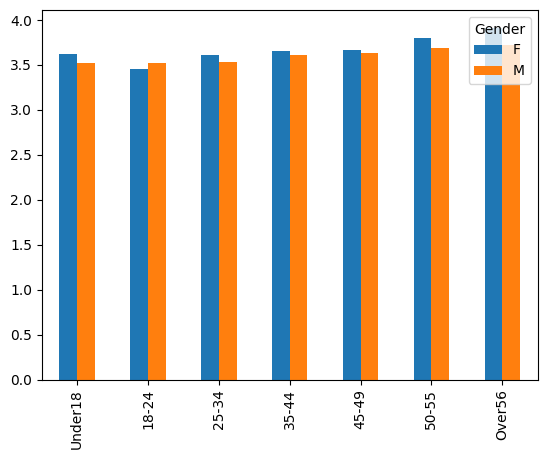

In [85]:
t4.plot(kind='bar')

In [86]:
jobs = pd.read_csv("gdrive/MyDrive/job.csv",engine='python')

In [87]:
jobs

,Occupation,Job
0,0,other or not specified
1,1,academic/educator
2,2,artist
3,3,clerical/admin
4,4,college/grad student
5,5,customer service
6,6,doctor/health care
7,7,executive/managerial
8,8,farmer
9,9,homemaker


In [92]:
df = pd.merge(df,jobs)

In [93]:
df

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,Job
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,K-12 student
1,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama,K-12 student
2,99,1193,2,982791053,F,1,10,19390,One Flew Over the Cuckoo's Nest (1975),Drama,K-12 student
3,349,1193,4,1007923963,M,1,10,08035,One Flew Over the Cuckoo's Nest (1975),Drama,K-12 student
4,960,1193,4,975122486,M,1,10,45244,One Flew Over the Cuckoo's Nest (1975),Drama,K-12 student
...,...,...,...,...,...,...,...,...,...,...,...
1000204,3893,2623,3,965793831,M,25,6,79401,Trippin' (1999),Comedy,doctor/health care
1000205,5021,820,4,962582951,M,50,6,90504,"Death in the Garden (Mort en ce jardin, La) (1...",Drama,doctor/health care
1000206,4628,1832,4,964050337,F,56,6,23225,Heaven's Burning (1997),Action|Drama,doctor/health care
1000207,4816,2309,4,965869069,F,45,6,04240,"Inheritors, The (Die Siebtelbauern) (1998)",Drama,doctor/health care


In [97]:
# index에 두 개 이상의ㅇ 컬럼 설정 => 리스트로 설정함
#성별,나이, 직업별 별점 평균 확인
pivotT = df.pivot_table(values='Rating',index=['Gender','Age'], columns='Job')

In [98]:
pivotT

Job         K-12 student  academic/educator    artist  clerical/admin  \
Gender Age                                                              
F      1        3.581952           3.919192  3.454545             NaN   
       18       3.184524           3.365123  3.220090        3.794947   
       25            NaN           3.521060  3.527070        3.551240   
       35            NaN           3.647967  3.576022        3.797710   
       45            NaN           3.592746  3.744530        3.857310   
       50            NaN           3.832181  3.883107        3.889518   
       56            NaN           3.855932  4.072978        4.064972   
M      1        3.492646           3.264781  3.619565             NaN   
       18       3.620345           3.346113  3.606355        3.544400   
       25       3.680000           3.530138  3.531350        3.602432   
       35       3.589404           3.490172  3.533841        3.608409   
       45            NaN           3.760632  3.823815        3.752647   
       50            NaN           3.696596  3.952599        3.635025   
       56       3.328431           3.751479  3.670762        3.933424   

Job         college/grad student  customer service  doctor/health care  \
Gender Age                                                               
F      1                     NaN               NaN                 NaN   
       18               3.501432          3.490683            3.423810   
       25               3.700129          3.960375            3.564413   
       35               3.209056          3.216377            3.756270   
       45               3.424242          3.822857            3.864678   
       50               3.759398          4.141975            3.681707   
       56                    NaN               NaN            3.693676   
M      1                3.574661               NaN                 NaN   
       18               3.534640          3.629012            3.213895   
       25               3.504109          3.563623            3.637719   
       35               3.936721          3.475034            3.748552   
       45               3.118644          3.255774            3.731000   
       50               3.604651          3.642718            3.628091   
       56                    NaN          4.045455            3.778489   

Job         executive/managerial    farmer  homemaker  ...  \
Gender Age                                             ...   
F      1                4.702703       NaN        NaN  ...   
       18               3.794118       NaN   3.778139  ...   
       25               3.599719       NaN   3.602782  ...   
       35               3.675799  3.081081   3.603309  ...   
       45               3.846446       NaN   3.856867  ...   
       50               3.708359  3.388235   3.947291  ...   
       56               3.812352  3.519231   3.685637  ...   
M      1                3.566667  3.651163        NaN  ...   
       18               3.592581  3.321429   4.000000  ...   
       25               3.515203  3.585781   3.750000  ...   
       35               3.581745  2.323529   3.401316  ...   
       45               3.697967  3.578077        NaN  ...   
       50               3.660114  3.864407        NaN  ...   
       56               3.810711  3.334821        NaN  ...   

Job         other or not specified  programmer   retired  sales/marketing  \
Gender Age                                                                  
F      1                  3.836493         NaN       NaN              NaN   
       18                 3.599043    3.456221       NaN         3.521266   
       25                 3.709261    3.639850       NaN         3.589326   
       35                 3.746459    3.618673       NaN         3.680515   
       45                 3.416619    3.701724  3.664474         3.385740   
       50                 3.751445    4.128060  3.808471         4.395257   
       56                 3.946942   

In [99]:
#결측치 0으로 설정
t6 = df.pivot_table(values='Rating', index=['Gender','Age'],columns='Job', fill_value=0)
t6

Job         K-12 student  academic/educator    artist  clerical/admin  \
Gender Age                                                              
F      1        3.581952           3.919192  3.454545        0.000000   
       18       3.184524           3.365123  3.220090        3.794947   
       25       0.000000           3.521060  3.527070        3.551240   
       35       0.000000           3.647967  3.576022        3.797710   
       45       0.000000           3.592746  3.744530        3.857310   
       50       0.000000           3.832181  3.883107        3.889518   
       56       0.000000           3.855932  4.072978        4.064972   
M      1        3.492646           3.264781  3.619565        0.000000   
       18       3.620345           3.346113  3.606355        3.544400   
       25       3.680000           3.530138  3.531350        3.602432   
       35       3.589404           3.490172  3.533841        3.608409   
       45       0.000000           3.760632  3.823815        3.752647   
       50       0.000000           3.696596  3.952599        3.635025   
       56       3.328431           3.751479  3.670762        3.933424   

Job         college/grad student  customer service  doctor/health care  \
Gender Age                                                               
F      1                0.000000          0.000000            0.000000   
       18               3.501432          3.490683            3.423810   
       25               3.700129          3.960375            3.564413   
       35               3.209056          3.216377            3.756270   
       45               3.424242          3.822857            3.864678   
       50               3.759398          4.141975            3.681707   
       56               0.000000          0.000000            3.693676   
M      1                3.574661          0.000000            0.000000   
       18               3.534640          3.629012            3.213895   
       25               3.504109          3.563623            3.637719   
       35               3.936721          3.475034            3.748552   
       45               3.118644          3.255774            3.731000   
       50               3.604651          3.642718            3.628091   
       56               0.000000          4.045455            3.778489   

Job         executive/managerial    farmer  homemaker  ...  \
Gender Age                                             ...   
F      1                4.702703  0.000000   0.000000  ...   
       18               3.794118  0.000000   3.778139  ...   
       25               3.599719  0.000000   3.602782  ...   
       35               3.675799  3.081081   3.603309  ...   
       45               3.846446  0.000000   3.856867  ...   
       50               3.708359  3.388235   3.947291  ...   
       56               3.812352  3.519231   3.685637  ...   
M      1                3.566667  3.651163   0.000000  ...   
       18               3.592581  3.321429   4.000000  ...   
       25               3.515203  3.585781   3.750000  ...   
       35               3.581745  2.323529   3.401316  ...   
       45               3.697967  3.578077   0.000000  ...   
       50               3.660114  3.864407   0.000000  ...   
       56               3.810711  3.334821   0.000000  ...   

Job         other or not specified  programmer   retired  sales/marketing  \
Gender Age                                                                  
F      1                  3.836493    0.000000  0.000000         0.000000   
       18                 3.599043    3.456221  0.000000         3.521266   
       25                 3.709261    3.639850  0.000000         3.589326   
       35                 3.746459    3.618673  0.000000         3.680515   
       45                 3.416619    3.701724  3.664474         3.385740   
       50                 3.751445    4.128060  3.808471         4.395257   
       56                 3.946942   

In [101]:
t7 = df.pivot_table(values='Rating', index=['Gender','Age'])
t7

Rating
Gender Age          
F      1    3.616291
       18   3.453145
       25   3.606700
       35   3.659653
       45   3.663044
       50   3.797110
       56   3.915534
M      1    3.517461
       18   3.525476
       25   3.526780
       35   3.604434
       45   3.627942
       50   3.687098
       56   3.720327

In [102]:
# 인덱스였던 걸 컬럼으로 바꾸기: unstack
# 컬럼이었던 걸 인덱스로 바꾸기: stack

t7_1 = t7.unstack()
t7_1

Rating                                                           
Age           1         18       25        35        45        50        56
Gender                                                                     
F       3.616291  3.453145  3.60670  3.659653  3.663044  3.797110  3.915534
M       3.517461  3.525476  3.52678  3.604434  3.627942  3.687098  3.720327

In [103]:
t7_2 = t7_1.stack()
t7_2

Rating
Gender Age          
F      1    3.616291
       18   3.453145
       25   3.606700
       35   3.659653
       45   3.663044
       50   3.797110
       56   3.915534
M      1    3.517461
       18   3.525476
       25   3.526780
       35   3.604434
       45   3.627942
       50   3.687098
       56   3.720327

In [104]:
t8 = df.pivot_table(values='Rating', index='Age', columns='Gender') #통계함수 생략 시 mean임
t8

Gender,F,M
Age,,
1,3.616291,3.517461
18,3.453145,3.525476
25,3.606700,3.526780
35,3.659653,3.604434
45,3.663044,3.627942
50,3.797110,3.687098
56,3.915534,3.720327


In [105]:
t9 = df.pivot_table(values='Rating', index='Age', columns='Gender', aggfunc='sum') #통계함수 생략 시 mean임
t9

Gender,F,M
Age,,
1,31921,64665
18,156866,486900
25,329436,1072903
35,181054,538971
45,88316,215946
50,68591,200674
56,36019,110051


In [107]:
import numpy as np

In [110]:
# 요약통계함수를 여러개 설정하기
# aggfunc = []

# t10 = df.pivot_table(values='Rating', index='Age', columns='Gender', aggfunc=['sum', 'mean'])
t10 = df.pivot_table(values='Rating', index='Age', columns='Gender', aggfunc=[np.sum,np.mean])
t10

sum               mean          
Gender       F        M         F         M
Age                                        
1        31921    64665  3.616291  3.517461
18      156866   486900  3.453145  3.525476
25      329436  1072903  3.606700  3.526780
35      181054   538971  3.659653  3.604434
45       88316   215946  3.663044  3.627942
50       68591   200674  3.797110  3.687098
56       36019   110051  3.915534  3.720327

In [114]:
# 나이, 성별별
t11_1 = df.pivot_table(values='Rating', index='Age', columns='Gender')
t11_1

Gender,F,M
Age,,
1,3.616291,3.517461
18,3.453145,3.525476
25,3.606700,3.526780
35,3.659653,3.604434
45,3.663044,3.627942
50,3.797110,3.687098
56,3.915534,3.720327


In [115]:
t11_2 = df.pivot_table(values='Rating', index='Age', columns='Gender', aggfunc='sum')
t11_2

Gender,F,M
Age,,
1,31921,64665
18,156866,486900
25,329436,1072903
35,181054,538971
45,88316,215946
50,68591,200674
56,36019,110051


In [116]:
# ==> 두 프레임을 단순연결 : pd.concat([a,b])
t12 = pd.concat([t11_1,t11_2])
t12

Gender,F,M
Age,,
1,3.616291,3.517461e+00
18,3.453145,3.525476e+00
25,3.606700,3.526780e+00
35,3.659653,3.604434e+00
45,3.663044,3.627942e+00
50,3.797110,3.687098e+00
56,3.915534,3.720327e+00
1,31921.000000,6.466500e+04
18,156866.000000,4.869000e+05


In [117]:
t12_2 = pd.concat([t11_1,t11_2],axis=1)
t12_2

Gender,F,M,F,M
Age,,,,
1,3.616291,3.517461,31921,64665
18,3.453145,3.525476,156866,486900
25,3.606700,3.526780,329436,1072903
35,3.659653,3.604434,181054,538971
45,3.663044,3.627942,88316,215946
50,3.797110,3.687098,68591,200674
56,3.915534,3.720327,36019,110051


In [130]:
# count_by_title = pd.value_counts(df['Title'])
count_by_title = df.groupby('Title').size()
count_by_title

Title
$1,000,000 Duck (1971)                         37
'Night Mother (1986)                           70
'Til There Was You (1997)                      52
'burbs, The (1989)                            303
...And Justice for All (1979)                 199
                                             ... 
Zed & Two Noughts, A (1985)                    29
Zero Effect (1998)                            301
Zero Kelvin (Kj rlighetens kj tere) (1995)      2
Zeus and Roxanne (1997)                        23
eXistenZ (1999)                               410
Length: 3706, dtype: int64

In [132]:
# 남성 최애 영화 5개, 여성 최애 영화 5개 뽑기
# 영화제목별로 별점 평균 나타내서 내림차순 정렬해 상위5개뽑으면댐
# 평가 횟수가 500이상인것

In [139]:
# count_by_title(시리즈)로부터 값이 500이상인 index만 뽑아와야댐
index_over_500 = count_by_title.index[count_by_title >=500]
index_over_500

Index(['10 Things I Hate About You (1999)', '101 Dalmatians (1961)',
       '12 Angry Men (1957)', '13th Warrior, The (1999)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '28 Days (2000)', 'Abyss, The (1989)',
       'Ace Ventura: Pet Detective (1994)', 'Addams Family, The (1991)',
       ...
       'Witness (1985)', 'Wizard of Oz, The (1939)', 'Working Girl (1988)',
       'World Is Not Enough, The (1999)', 'Wrong Trousers, The (1993)',
       'X-Files: Fight the Future, The (1998)', 'X-Men (2000)',
       'You've Got Mail (1998)', 'Young Frankenstein (1974)',
       'Young Guns (1988)'],
      dtype='object', name='Title', length=618)

In [140]:
# 영화제목별로 성별별로 별점 평균 출력
by_gender = df.pivot_table(values='Rating', index='Title', columns = 'Gender')
by_gender

Gender,F,M
Title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kj rlighetens kj tere) (1995),NaN,3.500000


In [152]:
# 영화가 총 3706건인데 그중 평가횟수가 500건 이상인 영화는6백 몇건이거든 그걸 추려
rating500 = by_gender.loc[index_over_500]
rating500

Gender,F,M
Title,,
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
...,...,...
"X-Files: Fight the Future, The (1998)",3.489474,3.493797
X-Men (2000),3.682310,3.851702
You've Got Mail (1998),3.542424,3.275591


In [153]:
# 위 결과는 평가횟수가 500건이상인 데이터에 대해 여자남자다있는데
# 여성top5를 구하고 싶으면
top_female = rating500['F'].sort_values(ascending=False)
top_female.head()

Title
Close Shave, A (1995)               4.644444
Wrong Trousers, The (1993)          4.588235
Schindler's List (1993)             4.562602
Shawshank Redemption, The (1994)    4.539075
To Kill a Mockingbird (1962)        4.536667
Name: F, dtype: float64

In [154]:
#남성 top5구하고 싶으면
top_male = rating500['M'].sort_values(ascending=False)
top_male.head()

Title
Godfather, The (1972)                                                  4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)    4.576628
Shawshank Redemption, The (1994)                                       4.560625
Raiders of the Lost Ark (1981)                                         4.520597
Usual Suspects, The (1995)                                             4.518248
Name: M, dtype: float64

In [158]:
#여자는 좋아하는데 남자는 안좋아하는 영화 top
#=> 여자 평점에서 남자 평점 뺀 파생변수를 추가해야댐
rating500['Diff'] = rating500['F']-rating500['M']
rating500

Gender,F,M,Diff
Title,,,
10 Things I Hate About You (1999),3.646552,3.311966,0.334586
101 Dalmatians (1961),3.791444,3.500000,0.291444
12 Angry Men (1957),4.184397,4.328421,-0.144024
"13th Warrior, The (1999)",3.112000,3.168000,-0.056000
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205,-0.039102
...,...,...,...
"X-Files: Fight the Future, The (1998)",3.489474,3.493797,-0.004323
X-Men (2000),3.682310,3.851702,-0.169391
You've Got Mail (1998),3.542424,3.275591,0.266834


In [160]:
female_better = rating500['Diff'].sort_values(ascending=False)
female_better.head(3)

Title
Dirty Dancing (1987)                     0.830782
Grease (1978)                            0.608224
Rocky Horror Picture Show, The (1975)    0.512885
Name: Diff, dtype: float64

In [163]:
# 호불호 갈리지 않는 영화
a = abs(rating500['Diff']).sort_values()
a.head()

Title
Jerry Maguire (1996)                           0.001109
Trainspotting (1996)                           0.001457
Dune (1984)                                    0.002165
Fatal Attraction (1987)                        0.002182
Indiana Jones and the Temple of Doom (1984)    0.002256
Name: Diff, dtype: float64